<a href="https://colab.research.google.com/github/tirth5828/Codes/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
from numpy import reshape
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
list_of_languages = ['Amharic','Arabic','Croatian','Czech','Dutch','Farsi','German','Hausa','Hindi','Hungarian','Indonesian','Kazakh','Malyalam','Maori','Marathi','Polish','Porteguese','Russian','Spanish','Swedish','Telugu','Thai','Urdu','Vietnamese','Xhosa','Zulu']

In [ ]:
name_list = ["Unigram" , "Bigram" , "Trigram"]
matrix_unigram = []
for i in range(len(list_of_languages)):
  matrix_unigram.append([])
  for j in range(len(list_of_languages)):
    matrix_unigram[i].append(0)

matrix_bigram = []
for i in range(len(list_of_languages)):
  matrix_bigram.append([])
  for j in range(len(list_of_languages)):
    matrix_bigram[i].append(0)
    
matrix_trigram = []
for i in range(len(list_of_languages)):
  matrix_trigram.append([])
  for j in range(len(list_of_languages)):
    matrix_trigram[i].append(0)


In [ ]:
for i,language1 in enumerate(list_of_languages):
  for j,language2 in enumerate(list_of_languages):
    with open(f'/gdrive/My Drive/IR Research/Corpus/Bible/Bible1/{language1}/unigram/{language1}_{language2}_dot_product_unigram_phonemes.csv', 'r' , encoding = "ISO-8859-1") as a:
      matrix_unigram[i][j] = float(a.read())
    with open(f'/gdrive/My Drive/IR Research/Corpus/Bible/Bible1/{language1}/bigram/{language1}_{language2}_dot_product_bigram_phonemes.csv', 'r' , encoding = "ISO-8859-1") as b:
      matrix_bigram[i][j] = float(b.read())
    with open(f'/gdrive/My Drive/IR Research/Corpus/Bible/Bible1/{language1}/trigram/{language1}_{language2}_dot_product_trigram_phonemes.csv', 'r' , encoding = "ISO-8859-1") as c:
      matrix_trigram[i][j] = float(c.read())

In [ ]:
array_unigram = np.array(matrix_unigram)
array_bigram = np.array(matrix_bigram)
array_trigram = np.array(matrix_trigram)

arrays_list = [array_unigram,array_bigram,array_trigram]

In [ ]:
f = open(f"/gdrive/My Drive/IR Research/Corpus/Bible/Bible1/unigram_dot_product_matrix.csv", 'w' , encoding = "ISO-8859-1")
f.write(str(array_unigram))
f.close()
f = open(f"/gdrive/My Drive/IR Research/Corpus/Bible/Bible1/bigram_dot_product_matrix.csv", 'w' , encoding = "ISO-8859-1")
f.write(str(array_bigram))
f.close()
f = open(f"/gdrive/My Drive/IR Research/Corpus/Bible/Bible1/trigram_dot_product_matrix.csv", 'w' , encoding = "ISO-8859-1")
f.write(str(array_trigram))
f.close()

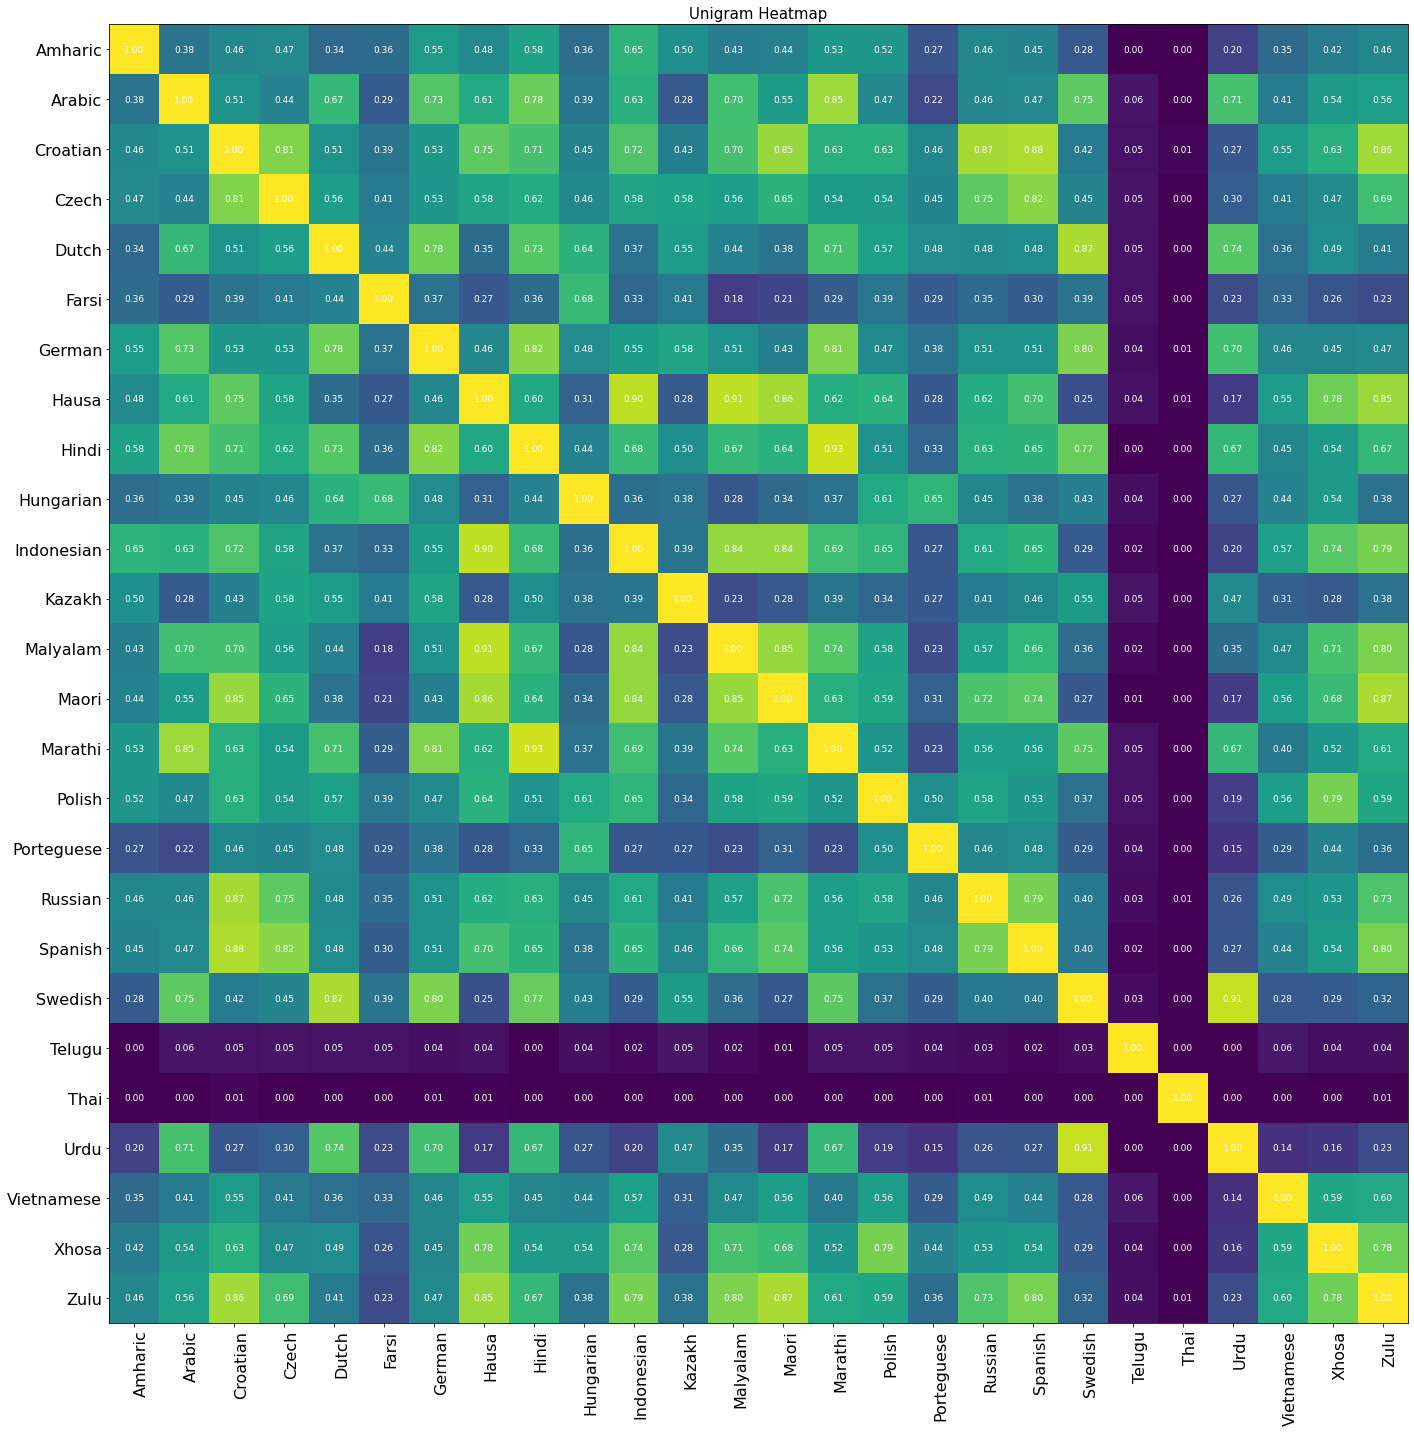

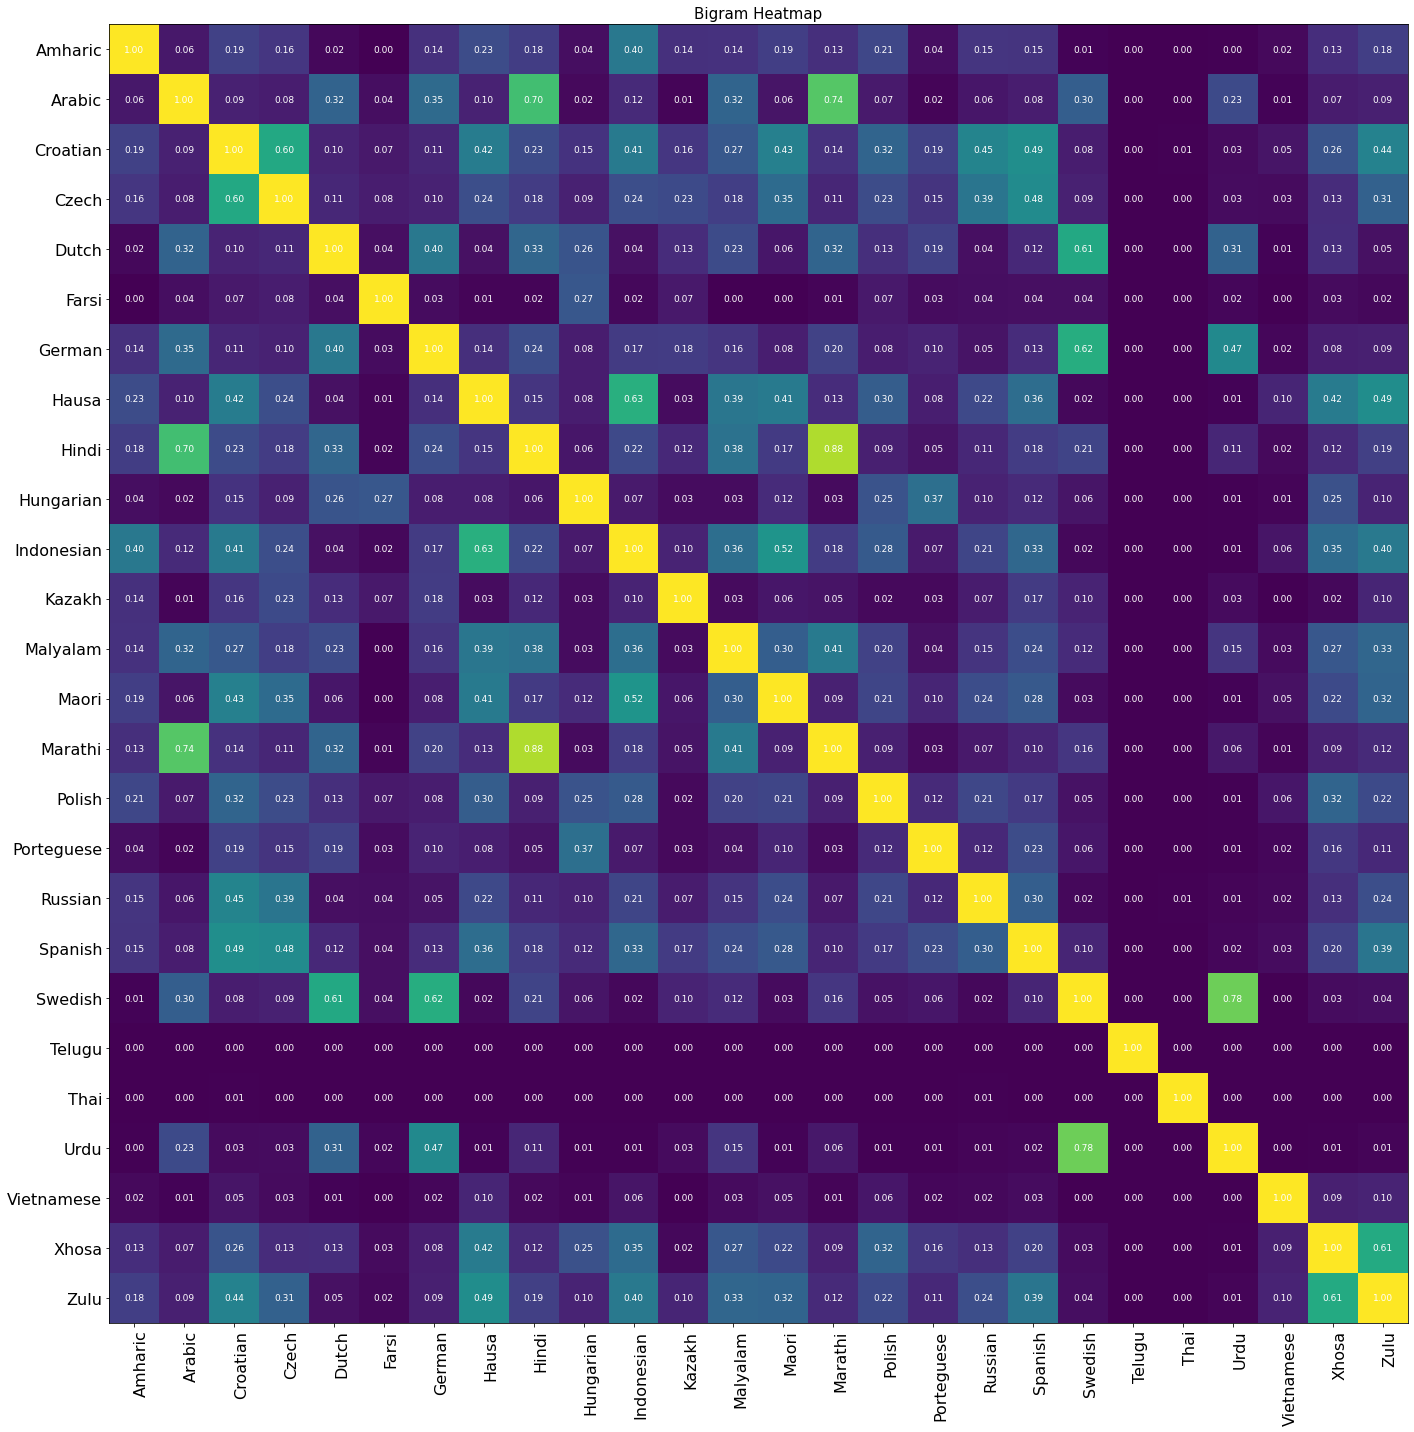

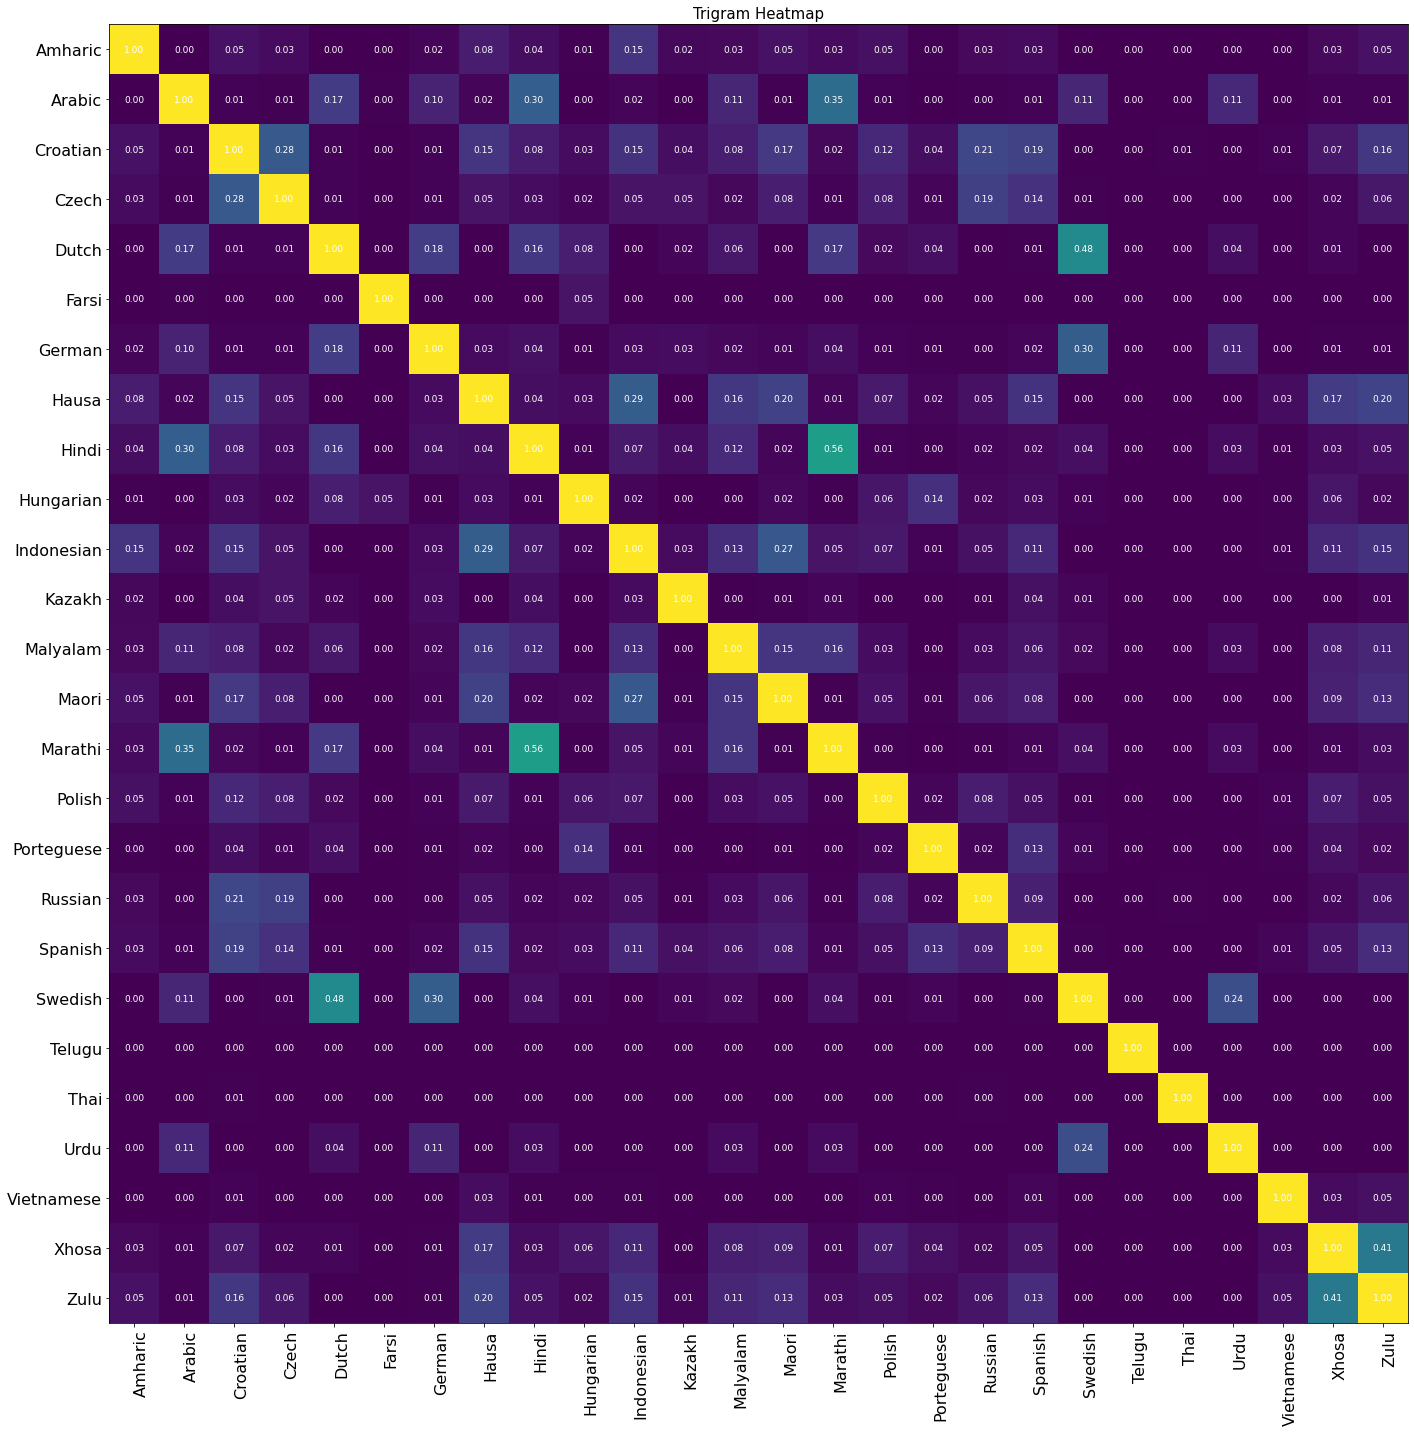

In [ ]:
for a,arrays in enumerate(arrays_list):  
  fig, ax = plt.subplots()
  im = ax.imshow(arrays)

  ax.set_xticks(np.arange(len(list_of_languages)))
  ax.set_yticks(np.arange(len(list_of_languages)))

  ax.set_xticklabels(list_of_languages,fontsize=16)
  ax.set_yticklabels(list_of_languages,fontsize=16)

  plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
          rotation_mode="anchor")
  
  for i in range(len(list_of_languages)):
      for j in range(len(list_of_languages)):
          text = ax.text(j, i, "{:.2f}".format(arrays[i, j]),
                        ha="center", va="center", color="w", size=9, fontdict=None)

  plt.title(f"{name_list[a]} Heatmap",fontsize=15)

  fig.set_figwidth(20)
  fig.set_figheight(20)

  fig.tight_layout()
  plt.show()

In [ ]:
vector_unigram = []
vector_bigram = []
vector_trigram = []

In [ ]:
for i,language1 in enumerate(list_of_languages):
  with open(f'/gdrive/My Drive/IR Research/Corpus/Bible/Bible1/{language1}/{language1}_unigram_phonemes.csv', 'r' , encoding = "ISO-8859-1") as d:
    vector_unigram.append(list(map(float , d.read().replace("[","").replace("]","").replace(" ","").split(","))))
  
  

In [ ]:
for i,language1 in enumerate(list_of_languages):
  with open(f'/gdrive/My Drive/IR Research/Corpus/Bible/Bible1/{language1}/{language1}_bigram_phonemes.csv', 'r' , encoding = "ISO-8859-1") as e:
    vector_bigram.append(list(map(float , e.read().replace("[","").replace("]","").replace(" ","").split(","))))

In [ ]:
for i,language1 in enumerate(list_of_languages):
  with open(f'/gdrive/My Drive/IR Research/Corpus/Bible/Bible1/{language1}/{language1}_trigram_phonemes.csv', 'r' , encoding = "ISO-8859-1") as f:
    vector_trigram.append(list(map( float , f.read().replace("[","").replace("]","").replace(" ","").split(","))))

KeyboardInterrupt: ignored

In [ ]:
def getTSNE(array,title):
  # sns.set(rc = {'figure.figsize' : ( 20, 20 ), 
  #              'axes.labelsize' : 12 })
  X = np.array(array)
  X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X)
  # print(X_embedded)
  df = pd.DataFrame()
  df["y"] = pd.array(list_of_languages)
  df["comp-1"] = X_embedded[:,0]
  df["comp-2"] = X_embedded[:,1]
  # g = sns.relplot(data = tips , x = "total_bill" , 
  #               y = "tip" , col = "time" , 
  #               hue = "day" , style = "day" , 
  #               kind = "scatter" )
  
  sns.relplot(x="comp-1", y="comp-2", 
                  hue=df.y.tolist(),
                  palette=sns.color_palette("hls", 26),
                  data=df).set(title=f"{title} t-SNE projection")
  return X_embedded
  
  # g.subplots_adjust( top = 0.85 )

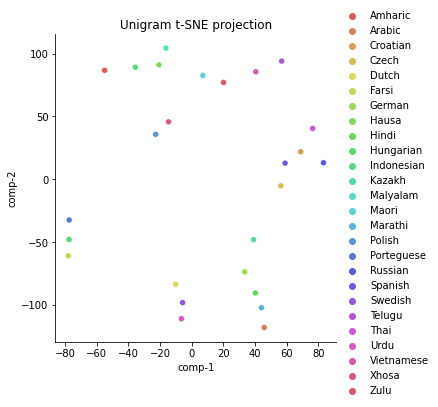

In [ ]:
Unigram_tSNE = getTSNE(vector_unigram,"Unigram")

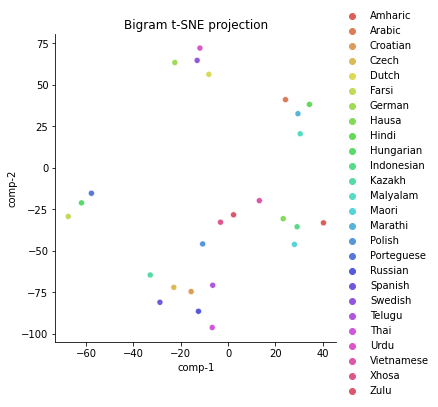

In [ ]:
Bigram_tSNE = getTSNE(vector_bigram,"Bigram")

In [ ]:
# getTSNE(vector_trigram,"Trigram")

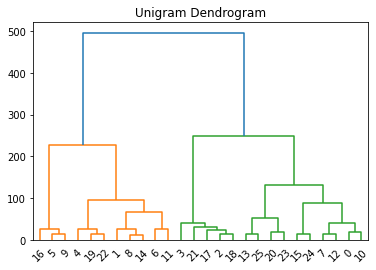

In [ ]:
Unigram_Dendrogram = sch.dendrogram(sch.linkage(Unigram_tSNE, method = 'ward'))
plt.title("Unigram Dendrogram")
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters=7,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(Unigram_tSNE)

In [ ]:
y_hc

array([4, 0, 2, 2, 5, 3, 0, 4, 0, 3, 4, 0, 4, 1, 0, 6, 3, 2, 2, 5, 1, 2,
       5, 1, 6, 1])

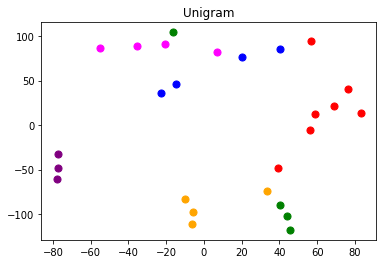

In [ ]:
plt.scatter(Unigram_tSNE[y_hc==0, 0], Unigram_tSNE[y_hc==0, 1], s=50, marker='o', color='red')
plt.scatter(Unigram_tSNE[y_hc==1, 0], Unigram_tSNE[y_hc==1, 1], s=50, marker='o', color='blue')
plt.scatter(Unigram_tSNE[y_hc==2, 0], Unigram_tSNE[y_hc==2, 1], s=50, marker='o', color='green')
plt.scatter(Unigram_tSNE[y_hc==3, 0], Unigram_tSNE[y_hc==3, 1], s=50, marker='o', color='purple')
plt.scatter(Unigram_tSNE[y_hc==4, 0], Unigram_tSNE[y_hc==4, 1], s=50, marker='o', color='orange')
plt.scatter(Unigram_tSNE[y_hc==5, 0], Unigram_tSNE[y_hc==5, 1], s=50, marker='o', color='magenta')
plt.scatter(Unigram_tSNE[y_hc==6, 0], Unigram_tSNE[y_hc==6, 1], s=50, marker='o', color='cyan')
plt.scatter(Unigram_tSNE[y_hc==7, 0], Unigram_tSNE[y_hc==7, 1], s=50, marker='o', color='black')
plt.title("Unigram")
plt.show()

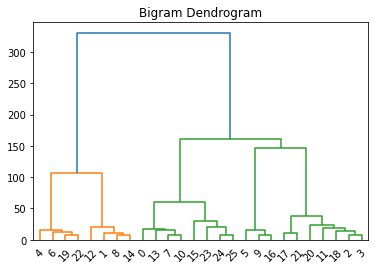

In [ ]:
Bigram_Dendrogram = sch.dendrogram(sch.linkage(Bigram_tSNE, method = 'ward'))
plt.title("Bigram Dendrogram")
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(Bigram_tSNE)

In [ ]:
y_hc

array([5, 2, 0, 0, 4, 3, 4, 5, 2, 3, 5, 0, 2, 5, 2, 1, 3, 0, 0, 4, 0, 0,
       4, 1, 1, 1])

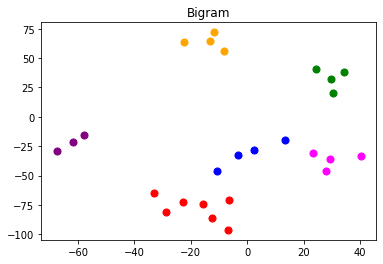

In [ ]:
plt.scatter(Bigram_tSNE[y_hc==0, 0], Bigram_tSNE[y_hc==0, 1], s=50, marker='o', color='red')
plt.scatter(Bigram_tSNE[y_hc==1, 0], Bigram_tSNE[y_hc==1, 1], s=50, marker='o', color='blue')
plt.scatter(Bigram_tSNE[y_hc==2, 0], Bigram_tSNE[y_hc==2, 1], s=50, marker='o', color='green')
plt.scatter(Bigram_tSNE[y_hc==3, 0], Bigram_tSNE[y_hc==3, 1], s=50, marker='o', color='purple')
plt.scatter(Bigram_tSNE[y_hc==4, 0], Bigram_tSNE[y_hc==4, 1], s=50, marker='o', color='orange')
plt.scatter(Bigram_tSNE[y_hc==5, 0], Bigram_tSNE[y_hc==5, 1], s=50, marker='o', color='magenta')
plt.scatter(Bigram_tSNE[y_hc==6, 0], Bigram_tSNE[y_hc==6, 1], s=50, marker='o', color='cyan')
plt.title("Bigram")
plt.show()